
# Applied Statistics Poject

---
Project Repository

Project Assessment for <em><strong>Applied Statistics</strong></em> module on <em><strong>Higher Diploma in Science in Computing in Data Analytics at ATU</strong></em>. 

Submitted by: Agnieszka Waszczuk 

Lecturer: Ian McLoughlin

---

<img src="photo1.jpg" width="800">



## Table of Contents

* Problem Statement 
* Software Libraries
* Description of the Dataset 
* Data Visualisation 
* $t$-test
* ANOVA test
* References


 ---

## Problem Statement

Analyze the PlantGrowth R dataset. You will find a [short description](https://vincentarelbundock.github.io/Rdatasets/doc/datasets/PlantGrowth.html ) of it on [Vicent Arel-Bundock's Rdatasets page](https://vincentarelbundock.github.io/Rdatasets/). The dataset contains two main variables, a treatment group and the weight of plants within those groups.

Your task is to perform t-tests and ANOVA on this dataset while describing the dataset and explaining your work. In doing this you should:

1. Download and save the dataset to your repository.

2. Describe the data set in your notebook.

3. Describe what a t-test is, how it works, and what the assumptions are.

4. Perform a t-test to determine whether there is a significant difference between the two treatment groups <code>trt1</code> and <code>trt2</code>.

5. Perform ANOVA to determine whether there is a significant difference between the three treatment groups <code>ctrl</code>, <code>trt1</code>, and <code>trt2</code>.

6. Explain why it is more appropriate to apply ANOVA rather than several t-tests when analyzing more than two groups.

## Software Libraries


* [Pandas](https://pandas.pydata.org/) is an open source data analysis and manipulation tool,
built on top of the Python programming language.

* [Seborn](https://seaborn.pydata.org/) is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

* [Matplotlib](https://matplotlib.org/)  is a comprehensive library for creating static, animated, and interactive visualizations in Python. Customize visual style and layout. Create publication quality plots.

* [NumPy](https://numpy.org/)  is a Python library that used for numerical calculations, mathematical functions, random number generators, commonly used with Pandas.

* [SciPy](https://scipy.org/ ) a statistical tool that performs analysis of variance (ANOVA) to analyze differences between groups.

 <em><strong>Reading in the CSV file</strong>

Pandas is a widely-used Python library for data science, analysis, and machine learning that offers a flexible and intuitive way to handle data sets of all sizes. One of the most important functionalities of pandas is the tools it provides for reading and writing data. For data available in a tabular format and stored as a CSV file, you can use pandas to read it into memory using the read_csv() function, which returns a pandas dataframe. 

Ref: DataCamp, Pandas, https://www.datacamp.com/tutorial/pandas-read-csv

In [1]:
# Data frames.
import pandas as pd 

# Plotting.
import matplotlib.pyplot as plt

# Statistical plotting.
import seaborn as sns

# Statistics.
import scipy.stats as stats


In [7]:
# Read the dataset.
plant_growth = pd.read_csv('PlantGrowth.csv', header=None)

In [8]:
plant_growth = pd.read_csv('PlantGrowth.csv')
print(plant_growth)

    rownames  weight group
0          1    4.17  ctrl
1          2    5.58  ctrl
2          3    5.18  ctrl
3          4    6.11  ctrl
4          5    4.50  ctrl
5          6    4.61  ctrl
6          7    5.17  ctrl
7          8    4.53  ctrl
8          9    5.33  ctrl
9         10    5.14  ctrl
10        11    4.81  trt1
11        12    4.17  trt1
12        13    4.41  trt1
13        14    3.59  trt1
14        15    5.87  trt1
15        16    3.83  trt1
16        17    6.03  trt1
17        18    4.89  trt1
18        19    4.32  trt1
19        20    4.69  trt1
20        21    6.31  trt2
21        22    5.12  trt2
22        23    5.54  trt2
23        24    5.50  trt2
24        25    5.37  trt2
25        26    5.29  trt2
26        27    4.92  trt2
27        28    6.15  trt2
28        29    5.80  trt2
29        30    5.26  trt2


## Description of the Dataset

The dataset, PlantGrowth R dataset available from RDatasets contains 30 instanes of 2 columns:
* rownames: Appears to be a numeric identifier for each observation 
* weight: The measured growth of plants 
* group: The treatment group for the plants 

This method <code>info()</code> prints information about a DataFrame: dtype, columns and non-null values.

In [9]:
# Display information about the dataset. 
plant_growth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rownames  30 non-null     int64  
 1   weight    30 non-null     float64
 2   group     30 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 852.0+ bytes


In [10]:
# Count of observations in each group.
print("\nCount of Observations by Group:")
print(plant_growth['group'].value_counts())


Count of Observations by Group:
group
ctrl    10
trt1    10
trt2    10
Name: count, dtype: int64


There are three groups:

* <code>ctrl</code>: Control group (10 observations).
* <code>trt1</code>: Treatment group 1 (10 observations).
* <code>trt2</code>: Treatment group 2 (10 observations).

In [11]:
# Checking for null entries in each column.
null_counts = plant_growth.isnull().sum()

# Display the count of null values in each column.
print("Null counts in each column:")
print(null_counts)

#Ref: https://www.geeksforgeeks.org/how-to-count-the-number-of-nan-values-in-pandas/

Null counts in each column:
rownames    0
weight      0
group       0
dtype: int64


In [12]:
# Checking first few rows.
plant_growth.head()

,rownames,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl


The <code>describe()</code> method returns description for numeric columns. Summarize the central tendency, count,standard deviation, min , max . 

Ref : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html

In [13]:
# Printing summary of dataset.
plant_growth.describe()

,rownames,weight
count,30.000000,30.000000
mean,15.500000,5.073000
std,8.803408,0.701192
min,1.000000,3.590000
25%,8.250000,4.550000
50%,15.500000,5.155000
75%,22.750000,5.530000
max,30.000000,6.310000


In [14]:
# Grouped by columns 
ctrl = plant_growth[plant_growth['group'] == 'ctrl']
trt1 = plant_growth[plant_growth['group'] == 'trt1']
trt2 = plant_growth[plant_growth['group'] == 'trt2']

# Ref: https://www.kaggle.com/code/residentmario/grouping-and-sorting
# Ref: https://stackoverflow.com/questions/17679089/pandas-dataframe-groupby-two-columns-and-get-counts

In [15]:
ctrl.describe()

,rownames,weight
count,10.00000,10.000000
mean,5.50000,5.032000
std,3.02765,0.583091
min,1.00000,4.170000
25%,3.25000,4.550000
50%,5.50000,5.155000
75%,7.75000,5.292500
max,10.00000,6.110000


In [16]:
trt1.describe()

,rownames,weight
count,10.00000,10.000000
mean,15.50000,4.661000
std,3.02765,0.793676
min,11.00000,3.590000
25%,13.25000,4.207500
50%,15.50000,4.550000
75%,17.75000,4.870000
max,20.00000,6.030000


In [17]:
trt2.describe()

,rownames,weight
count,10.00000,10.000000
mean,25.50000,5.526000
std,3.02765,0.442573
min,21.00000,4.920000
25%,23.25000,5.267500
50%,25.50000,5.435000
75%,27.75000,5.735000
max,30.00000,6.310000


##  Data Visualisation 

We can use various of data visualization modules to presents data, using Python libraries. In this project we use:

* Matplotlib
* Seaborn

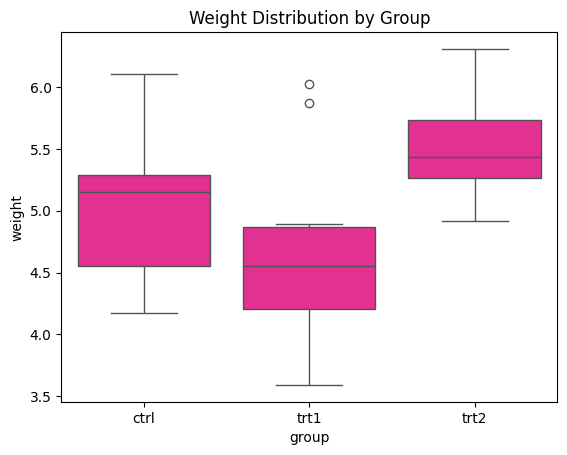

In [18]:
# Box plot.
sns.boxplot(x='group', y='weight', data=plant_growth, color="deeppink")
# Adding title.
plt.title('Weight Distribution by Group')
# Show the plot.
plt.show()

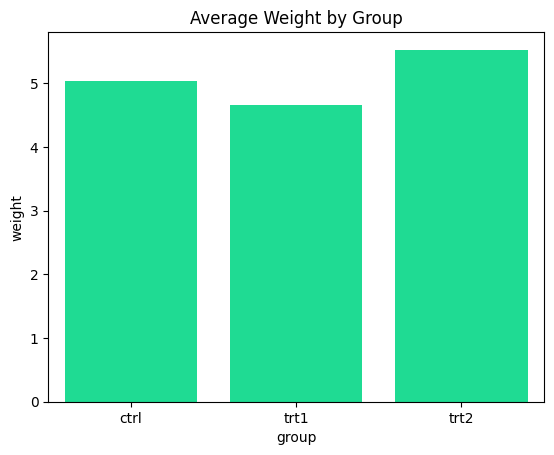

In [19]:
# Bar plot of means.
avg_weight = plant_growth.groupby('group')['weight'].mean().reset_index()
sns.barplot(x='group', y='weight', data=avg_weight, color="mediumspringgreen")
# Adding title.
plt.title('Average Weight by Group')
# Show the plot.
plt.show()

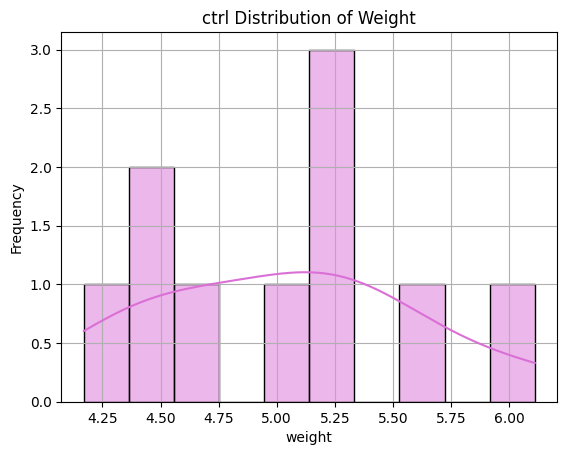

In [20]:
## Create plot of ctrl.
sns.histplot(data=ctrl, x='weight', bins=10, kde=True, color='orchid')

# Set a gray background.
sns.set_style('darkgrid')

# Add labels and title.
plt.title('ctrl Distribution of Weight')
plt.xlabel('weight')
plt.ylabel('Frequency')
plt.grid(True)

# Show the plot
plt.show()

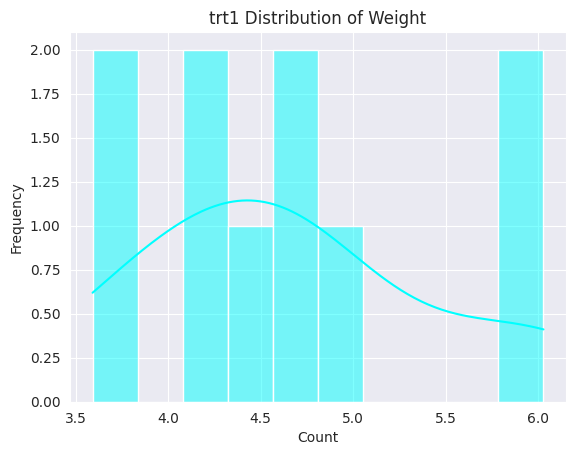

In [21]:
# Create plot of trt1.
sns.histplot(data=trt1, x='weight', bins=10, kde=True, color='aqua')

# Set a gray background.
sns.set_style('darkgrid')

# Add labels and title.
plt.title('trt1 Distribution of Weight')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.grid(True)

# Show the plot.
plt.show()

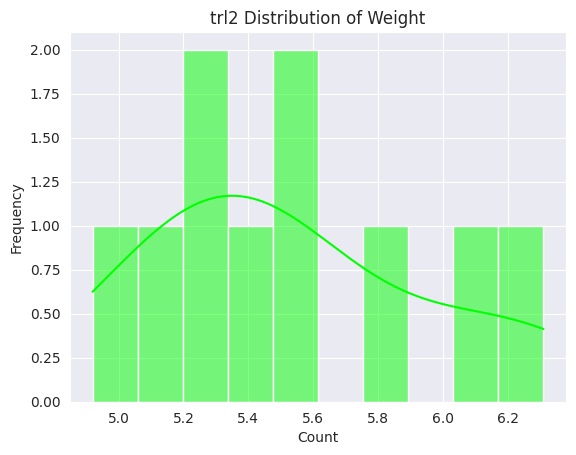

In [22]:
# Create plot of trt2.
sns.histplot(data=trt2, x='weight', bins=10, kde=True,  color='lime')

# Set a gray background.
sns.set_style('darkgrid')

# Add labels and title.
plt.title('trl2 Distribution of Weight')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.grid(True)

# Show the plot.
plt.show()

 For the project, I use Shapiro-Wilk test using <code>scipy.stats.shapiro</code> function from the scipy library to check for normality.Performing the Shapiro-Wilk test for each of the groups in the data set supports the null hypothesis that the groups are normally distributed, the test statistic is close to one, and the p-value is greater than 0.05% for each weight group. 

In [23]:
 # Importing the stats from scipy.
from scipy import stats 

# Ref:https://docs.scipy.org/doc/scipy-1.10.0/reference/generated/scipy.stats.shapiro.html

In [24]:
# Shapiro-Wilk test for normality of ctrl
ctrl = plant_growth[plant_growth['group'] == 'ctrl']
shapiro_test = stats.shapiro(ctrl['weight'])

# Print the results
print("Test Statistic:", shapiro_test.statistic)
print("Test p-value:", shapiro_test.pvalue)

Test Statistic: 0.9566814905276368
Test p-value: 0.7474734451902585


In [25]:
# Shapiro-Wilk test for normality of trt1
ctrl = plant_growth[plant_growth['group'] == 'trt1']
shapiro_test = stats.shapiro(ctrl['weight'])

# Print the results
print("Test Statistic:", shapiro_test.statistic)
print("Test p-value:", shapiro_test.pvalue)

Test Statistic: 0.9304106932921845
Test p-value: 0.45194395810927823


In [26]:
# Shapiro-Wilk test for normality of trt2
ctrl = plant_growth[plant_growth['group'] == 'trt2']
shapiro_test = stats.shapiro(ctrl['weight'])

# Print the results
print("Test Statistic:", shapiro_test.statistic)
print("Test p-value:", shapiro_test.pvalue)

Test Statistic: 0.9410051970546394
Test p-value: 0.5642518926711526


## $t$-test


<em><strong>t-test</strong></em> is a statistical test used to test whether the difference between the response of two groups is statistically significant or not. It is any statistical hypothesis test in which the test statistic follows a Student's t-distribution under the null hypothesis. It is most commonly applied when the test statistic would follow a normal distribution if the value of a scaling term in the test statistic were known (typically, the scaling term is unknown and is therefore a nuisance parameter). When the scaling term is estimated based on the data, the test statistic—under certain conditions—follows a Student's t distribution. 
The t-test's most common application is to test whether the means of two populations are significantly different. In many cases, a Z-test will yield very similar results to a t-test because the latter converges to the former as the size of the dataset increases.

Ref: https://www.scribbr.com/statistics/t-test/

Ref: https://en.wikipedia.org/wiki/Student%27s_t-test


In [29]:
# Import library 
from scipy.stats import ttest_rel

#  t-test
t_stat, p_value = ttest_rel(ctrl['weight'], trt1['weight'])

# Printing results for t-statistic.
print(f"T-statistic: {t_stat:.4f}")

# Printing results for p-value.
print(f"P-value: {p_value:.4f}")

T-statistic: 2.8464
P-value: 0.0192


In [30]:
if p_value < 0.05:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Reject the null hypothesis


T-test between trt1 and trt2

In [31]:
# Import library.
from scipy.stats import ttest_ind

# Dataset for trt1 and trt2.
trt1 = plant_growth[plant_growth['group'] == 'trt1']['weight']
trt2 = plant_growth[plant_growth['group'] == 'trt2']['weight']

# Perform the t-test for trt1 and trt2.
t_stat, p_value = ttest_ind(trt1, trt2)

# Printing results for t-statistic.
print(f"t-statistic: {t_stat:.3f}, p-value: {p_value:.3f}")

# Interpretation.
if p_value > 0.05:
    print("Fail to reject the null hypothesis: No significant difference between trt1 and trt2.")
else:
    print("Reject the null hypothesis: Significant difference between trt1 and trt2.")

t-statistic: -3.010, p-value: 0.008
Reject the null hypothesis: Significant difference between trt1 and trt2.


The t-test shows a t-statistic of (-3.010) and a p-value of (0.008). Since the p-value is less than (0.05), the null hypothesis is rejected. This indicates a statistically significant difference between the groups trt1 and trt2.

Ref: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mstats.ttest_rel.html

Ref : https://www.statology.org/when-to-reject-null-hypothesis/

## ANOVA

Analysis of Variance <em><strong>ANOVA</strong></em> is a statistical test used to compare means between the three groups <code>ctrl</code>,<code>trt1</code>, <code>trt2</code>.



Hypothesis for the <em><strong>ANOVA Test</strong></em>:

* <em><strong>Null Hypothesis</strong></em> ($H0$) : There is no significant difference in the mean weights of plants across the three groups (<code>ctrl</code>,<code>trt1</code>, <code>trt2</code>).
* <em><strong>Alternative Hypothesis</strong></em> ($H1$)s: At least one group has a significantly different mean weight compared to the others.

In [34]:
# One-way Anova.
stat, p = stats.f_oneway(ctrl['weight'], trt1['weight'], trt2['weight'])

# Show the p value.
p

np.float64(0.0028774208769573976)

<em><strong>Conclusion:</strong></em>

* The p-value from the ANOVA test is 0.0029 (approximately), which is much smaller than the commonly used significance level of 0.05.

* Reject the Null Hypothesis : There is a statistically significant difference in the mean weights of plants among the three groups <code>ctrl</code>,<code>trt1</code>, <code>trt2</code>.

* This indicates that at least one group mean is different from the others.




### References

Ref: Dobson, A. J., 1983. An Introduction to Statistical Modelling. London: Chapman and Hall.

Ref: Student, 1908. The probable error of a mean. Biometrika 6 (1): 1–25. DOI: https://doi.org/10.1093/biomet/6.1.1.

Ref: https://i.sstatic.net/lFZum.png

Ref: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mstats.ttest_rel.html

Ref : https://www.statology.org/when-to-reject-null-hypothesis/

### End.